# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modul.coes
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv(r"C:\DATASET\covid_19_data.csv")
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df['Country/Region'].value_counts().count()

229

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None


In [4]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
# Display basic information about the dataset

df.dtypes


SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

# 2. Data Cleaning:

In [3]:
# Finding missing values
df.isna().sum()

df.dropna(inplace=True)
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Checkin for duplicates
# print("Number of duplicates:", df.duplicated().sum())


df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

print('Number of duplicates:',df.duplicated().sum())

Number of duplicates: 0


In [8]:
# Convert data types if necessary 

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [9]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
# Checkin for duplicates


print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [11]:
categorical=[]
continous=[]

for i in df:
    if df[i].dtypes=='object':
        categorical.append(i)
    else:
        continous.append(i)
        
print('categorical=',categorical)
print('continous=',continous)

categorical= ['Province/State', 'Country/Region', 'Last Update']
continous= ['SNo', 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered']


In [12]:
# Treating missing values
df['Province/State'].mode()

for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

In [13]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [14]:
# Descriptive statistics
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,228326.000000,228326,2.283260e+05,228326.000000,2.283260e+05
mean,158732.777113,2020-11-14 03:17:45.686780928,8.021381e+04,1961.373273,4.184345e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,85431.250000,2020-08-11 00:00:00,1.225000e+03,15.000000,0.000000e+00
50%,159305.500000,2020-11-18 00:00:00,1.175750e+04,234.000000,1.211000e+03
75%,232835.750000,2021-02-22 00:00:00,4.841125e+04,1411.000000,1.660275e+04
max,306429.000000,2021-05-29 00:00:00,5.713215e+06,112385.000000,6.399531e+06
std,85862.065298,NaN,2.493661e+05,5871.937048,1.793670e+05


In [15]:
# Summary statistics for categorical columns

print(df['Country/Region'].value_counts())

Country/Region
Russia            30129
US                26740
Japan             17932
Mainland China    15758
India             13050
Colombia          12419
Mexico            12199
Brazil            10144
Ukraine            9801
Peru               9542
Italy              8001
Spain              7615
Sweden             7539
Canada             6960
UK                 6553
Germany            6481
Chile              6375
Netherlands        5864
France             4544
Australia          3785
Pakistan           2478
Belgium            2388
Denmark             893
Hong Kong           494
Macau               494
Taiwan               49
China                48
Others               46
Israel                5
Name: count, dtype: int64


In [16]:
# Summary statistics for categorical columns
df['Province/State'].value_counts()

Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Johnson County, IA                 1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: count, Length: 736, dtype: int64

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

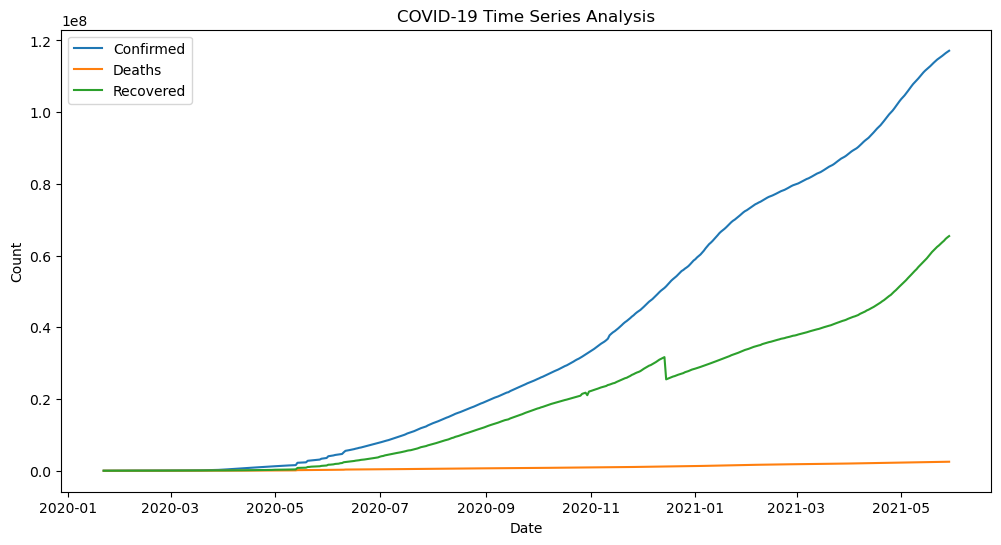

In [17]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
# df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})



# Plot time series data using line plot

# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




<Axes: xlabel='ObservationDate', ylabel='Deaths'>

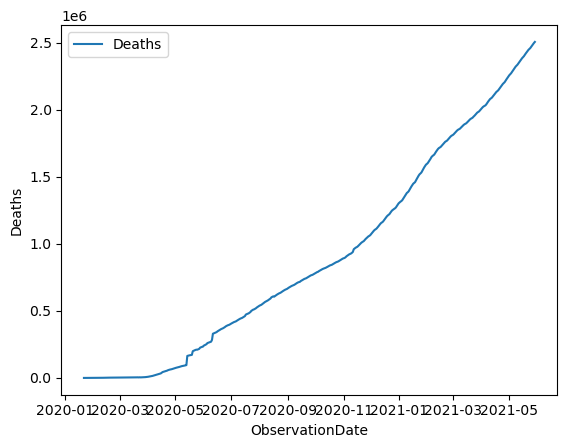

In [18]:
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')

# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

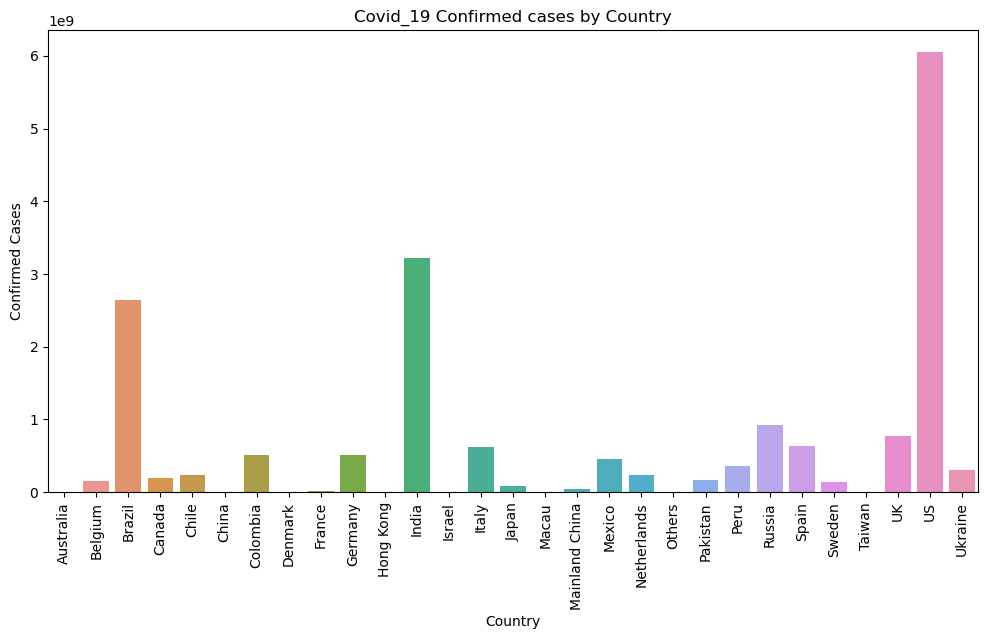

None


In [19]:
# Geographical analysis
# df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum','Deaths': 'sum','Recovered': 'sum'})

# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.figure(figsize=(12,6))
sns.barplot(x=df_country.index, y='Confirmed',data=df_country)
sns.barplot(x=df_country.index, y='Deaths',data=df_country)
sns.barplot(x=df_country.index, y='Recovered', data=df_country)
plt.title('Covid_19 Confirmed cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90,ha='center')

print(plt.show())

In [29]:
df_country.shape

(29, 3)

In [27]:
df_country.value_counts()

Confirmed     Deaths       Recovered   
0.000000e+00  0.0          0.000000e+00    1
2.304008e+08  3616057.0    3.295280e+06    1
3.221090e+09  44256013.0   2.898258e+09    1
2.649295e+09  72339029.0   2.311993e+09    1
9.211500e+08  18271229.0   7.883275e+08    1
7.705376e+08  27316263.0   2.323781e+06    1
6.401320e+08  18124340.0   5.727280e+07    1
6.277543e+08  24852224.0   4.851544e+08    1
5.174361e+08  13150115.0   4.493167e+08    1
5.148170e+08  13962927.0   4.686380e+08    1
4.595573e+08  42918161.0   3.612402e+08    1
3.584896e+08  13119233.0   3.227364e+08    1
3.102261e+08  6209502.0    2.342478e+08    1
2.315812e+08  5707664.0    2.166768e+08    1
1.934975e+08  5692896.0    1.715769e+08    1
5.000000e+00  0.0          0.000000e+00    1
1.632456e+08  3489065.0    1.453124e+08    1
1.547341e+08  4219275.0    0.000000e+00    1
1.407718e+08  3167242.0    0.000000e+00    1
8.866606e+07  1555677.0    7.805405e+07    1
4.082260e+07  2089872.0    3.689744e+07    1
1.918464e+07  1

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

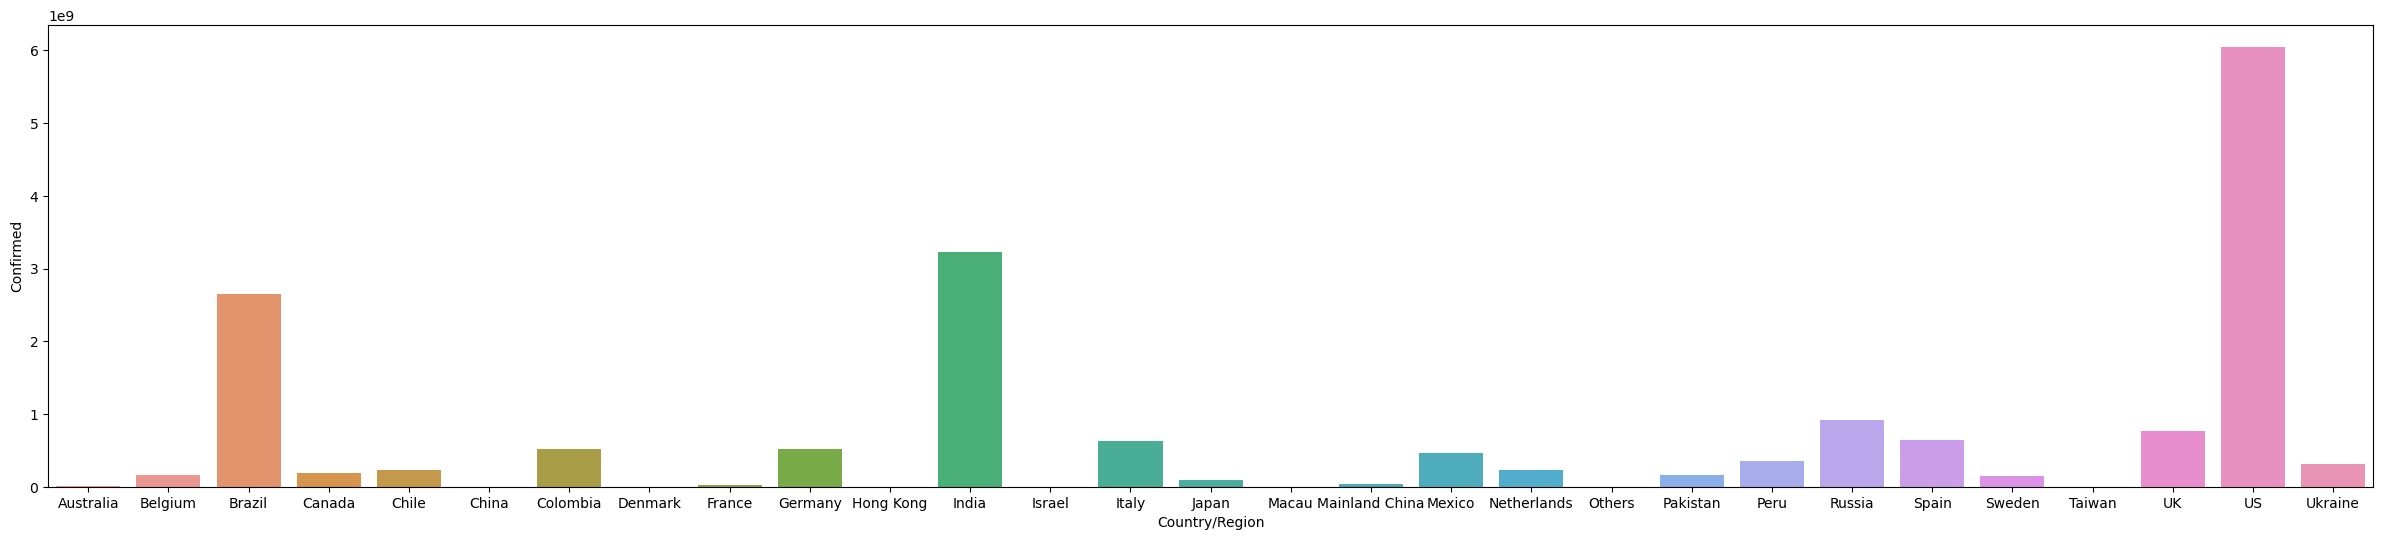

In [33]:
# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.figure(figsize=(30,6))
sns.barplot(x= df_country.index, y='Confirmed', data=df_country)


# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

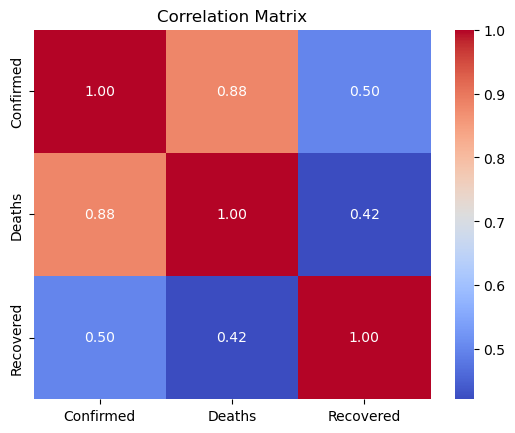

In [5]:
# Correlation analysis between confirmed,deaths and recovered
correlation_matrix=df[['Confirmed','Deaths','Recovered']].corr()
# Plot correlation on heat map

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [23]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

total_no = df.groupby('Country/Region').agg({'Confirmed': 'sum','Deaths': 'sum','Recovered': 'sum'})
total_no

,Confirmed,Deaths,Recovered
Country/Region,,,
Australia,9.447430e+06,268435.0,7.219933e+06
Belgium,1.547341e+08,4219275.0,0.000000e+00
Brazil,2.649295e+09,72339029.0,2.311993e+09
Canada,1.934975e+08,5692896.0,1.715769e+08
Chile,2.315812e+08,5707664.0,2.166768e+08
China,0.000000e+00,0.0,0.000000e+00
Colombia,5.148170e+08,13962927.0,4.686380e+08
Denmark,2.122260e+05,186.0,1.929090e+05
France,1.918464e+07,157809.0,9.383745e+06


In [24]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.



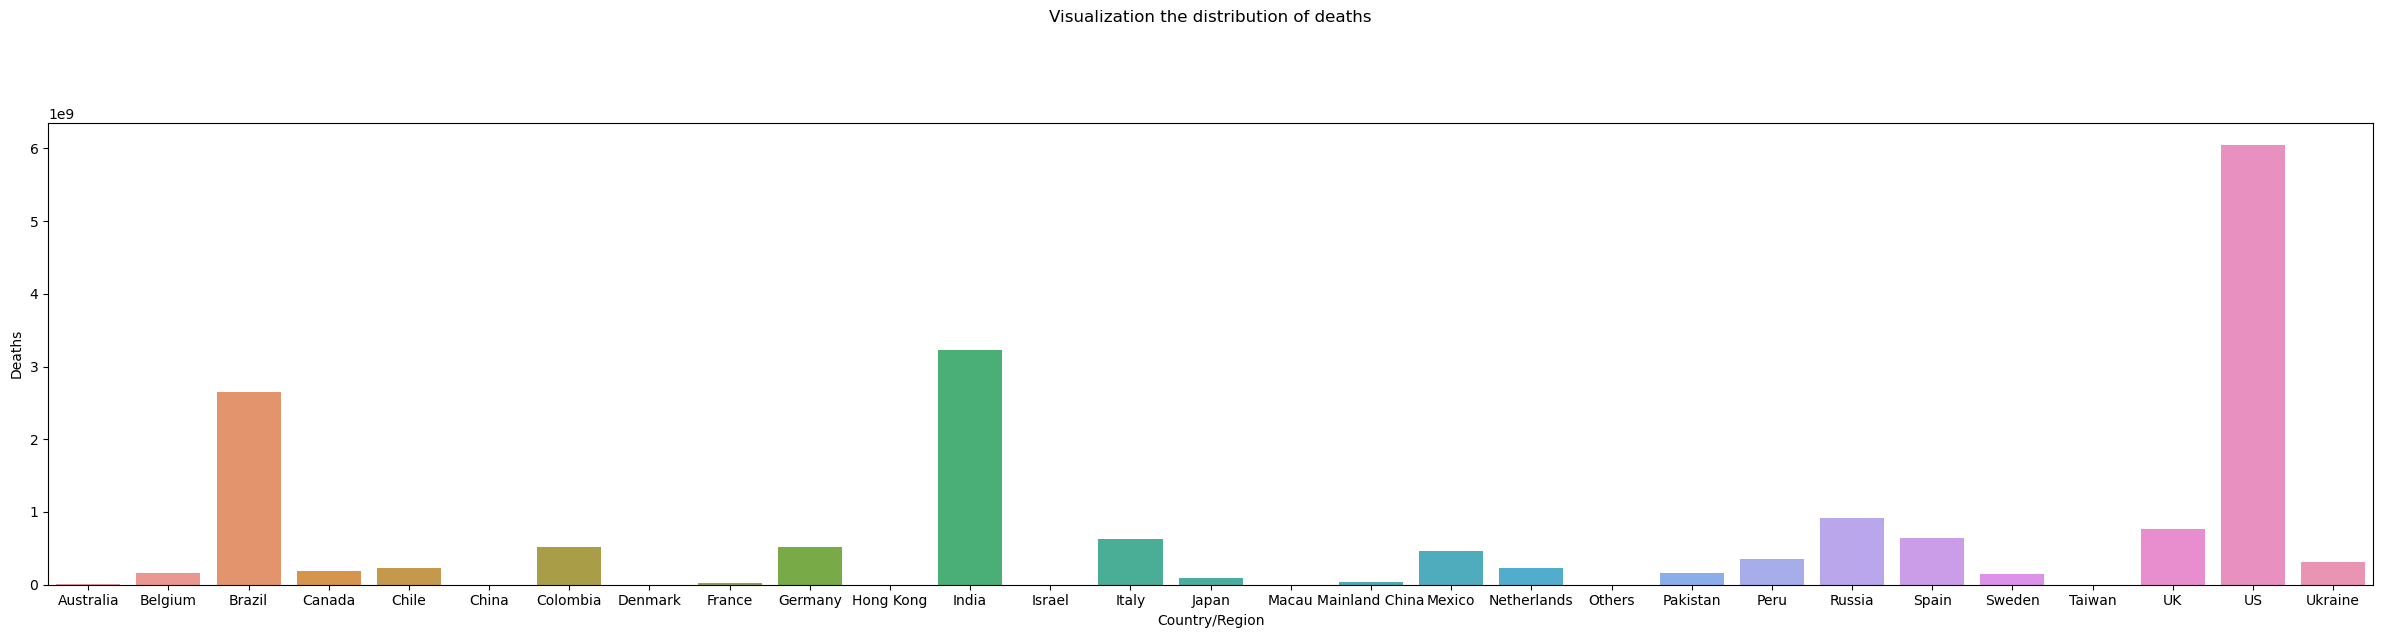

In [25]:
# Visualize the distribution of deaths using bar chart
import matplotlib.pyplot as plt
import seaborn as sns

df_deathdistribution=df.groupby('Country/Region').agg({'Confirmed': 'sum','Deaths' : 'sum'})

plt.figure(figsize=(30,6))
sns.barplot(x=df_deathdistribution.index,y='Confirmed' ,data=df_deathdistribution)
sns.barplot(x=df_deathdistribution.index,y='Deaths' , data= df_deathdistribution)
plt.title('Visualization the distribution of deaths',y=1.2)
plt.show()


In [ ]:
df['Confirmed'].plot(kind='bar')